In [1]:
import math
import random as rd
import numpy as np
from scipy.integrate import quad
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N = 100
theta = 10
xn = [rd.paretovariate(theta) for i in range(N)]
print(xn)

[1.142622735411052, 1.0223998442465323, 1.191643045325158, 1.0227537031171177, 1.016908627766659, 1.3231514064803898, 1.328026257385336, 1.0654014512416983, 1.0434477502172033, 1.136717780646222, 1.0219523072593346, 1.28990155178308, 1.0236204890766858, 1.1725741695202567, 1.0491961674652788, 1.091544012669205, 1.0139633176501157, 1.053409394611531, 1.0053286730694955, 1.0495283207711756, 1.0461698878977566, 1.202253834010257, 1.064003158388943, 1.0952952433229732, 1.138784782794256, 1.1441872577606629, 1.1044803164728747, 1.0029810849085485, 1.046839855780362, 1.0837576226780785, 1.0857450975418597, 1.049838482143493, 1.1507383452183446, 1.1323757485751635, 1.0369678896265049, 1.0661098026001168, 1.069941964541934, 1.232039913990713, 1.0366518260870408, 1.0363892715274425, 1.1719753970788591, 1.0238324759764177, 1.1740381256649937, 1.0765425278263014, 1.0187018242010113, 1.0060846277000408, 1.1624712551445966, 1.2351224732281276, 1.2506000300729387, 1.0456570401120049, 1.0359677563331

In [3]:
med = (xn[49] + xn[50])/2

In [4]:
t1, t2 = -1.96, 1.96
theta1 = 1 + N/sum([math.log(xn[i]) for i in range(N)])
border1_asympt = theta1 - t2 * (theta1 - 1)/ (N)**0.5
border2_asympt = theta1 - t1 * (theta1 - 1)/ (N)**0.5
print(f'ОМП: {theta1}\n')
print(f'Асимптотический доверительный интервал:\n\
{border1_asympt} < theta < {border2_asympt}')

ОМП: 11.125613966003725

Асимптотический доверительный интервал:
9.140993628666994 < theta < 13.110234303340455


In [5]:
deltas = []
medas = []
for i in range(1000):
    xn_sub = np.random.choice(xn, N) 
    theta_ = 1 + N/sum([math.log(xn_sub[i]) for i in range(N)]) #омп
    deltas.append(theta_ - theta1)
    med_ = (xn_sub[49] + xn_sub[50])/2
    medas.append(med_ - med)
deltas.sort()
medas.sort()
print(f'Bootstrap доверительный интервал медианы:\n{med - medas[974]} < med < {med - medas[24]}\n')
border1_nonparam = theta1 - deltas[974]
border2_nonparam = theta1 - deltas[24]
print(f'Непараметрический bootstrap доверительный интервал:\n{border1_nonparam} < theta < {border2_nonparam}')

Bootstrap доверительный интервал медианы:
0.8250347893840968 < med < 1.0659345811287184

Непараметрический bootstrap доверительный интервал:
9.139832812049255 < theta < 12.516572918521137


In [6]:
thetas = []
N_boot2=50000
for i in range(N_boot2):
    xn_sub = np.random.choice(xn, N) 
    theta_ast = 1 + N/sum([math.log(xn_sub[i]) for i in range(N)]) 
    thetas.append(theta_ast)

thetas.sort()
k1 = round((1-0.95)/2*N_boot2)
k2 = round((1+0.95)/2*N_boot2)

border1_param = thetas[k1-1]
border2_param = thetas[k2-1]
print(f'Параметрический bootstrap доверительный интервал:\n{border1_param} < theta < {border2_param}\n')

Параметрический bootstrap доверительный интервал:
9.62676153750093 < theta < 13.119711739450665



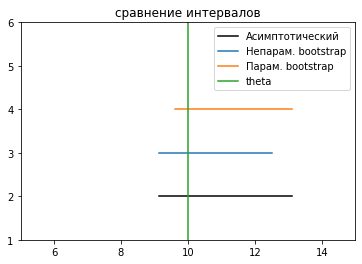

In [7]:
asympt = np.linspace(border1_asympt, border2_asympt, 200)
plt.plot(asympt, 2*np.ones_like(asympt),color='black', label='Асимптотический')

boot = np.linspace(border1_nonparam, border2_nonparam, 200)
plt.plot(boot, 3*np.ones_like(boot), label='Непарам. bootstrap')

precise = np.linspace(border1_param, border2_param, 200)
plt.plot(precise, 4*np.ones_like(precise), label='Парам. bootstrap')

plt.plot([theta, theta],[1, 7], label="theta")
plt.xlim(5, 15)
plt.ylim(1, 6)
plt.title("сравнение интервалов")
plt.legend()